# Telco Customer Churn EDA

## Task Description ##

In this analysis I will focus on exploring the telco customer churn dataset. 
The target variable is 'churn' which indicates if a customer has cancelled their contract. 

The goal of this analysis is to identify patterns and correlations with the target variable and finally list some potential action items for a potential management audience. 

## Documentation ## 

This dataset was downloaded from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn/version/1?select=WA_Fn-UseC_-Telco-Customer-Churn.csv)

The data dictionary can be found the [IBM Communit URL](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [28]:
df = pd.read_csv(r'D:\Documents\dataSets\telco_customer_churn.csv')

# Data Understanding

In this section, we will focus on inspecting the data surface properties: 
 
- data format 
- number of records and features
- missing values

In [29]:
df.shape

(7043, 21)

In [30]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [33]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [34]:
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Assuming that each row uniquely identify a contract related to a customer ID, I will drop the customerID column. 

In [35]:
df.drop('customerID', axis = 1, inplace = True)

**Observation**: 'TotalCharges' is stored as an object. I will convert it to numeric and pass coerce as error attribute.

In [36]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

**Logic**:

- I could assume that those values should be 0 as it could have originally been stored as NULL and finally replaced with empty string
- To support this idea I could have a look at the 'Tenure'. If the tenure is 0 then we can assume that these are new customers and the monthly charges value should be 0

In [37]:
df['tenure'][df.TotalCharges== 0].unique()

array([0], dtype=int64)

The hypothesis is confirmed. All observations where 'TotalCharges' equals ' ' have 0 tenure.
But what about the 'Monthly Charges'?

I'm going to investigate also 'MonthlyCharges' just to be sure to have clean data. However, I believe that the value of monthly charges is coming from order data which is stored when the customer signs in the contract. 
Hence, we shouldn't miss it. 

In [38]:
df['MonthlyCharges'][df.TotalCharges== 0]

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

Hypothesis confirmed.

I will keep exploring the data quality.

In [39]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Missing Values

I want to get an idea of I should expect within each column for better understanding of telco stored data. 
I am going to iterate through all columns and return a list of the unique values stored in which one of them.

In [40]:
for c in df.columns: 
    if df[c].dtype == 'O':
        print(c,"\n",df[c].unique() )

gender 
 ['Female' 'Male']
Partner 
 ['Yes' 'No']
Dependents 
 ['No' 'Yes']
PhoneService 
 ['No' 'Yes']
MultipleLines 
 ['No phone service' 'No' 'Yes']
InternetService 
 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 
 ['No' 'Yes' 'No internet service']
OnlineBackup 
 ['Yes' 'No' 'No internet service']
DeviceProtection 
 ['No' 'Yes' 'No internet service']
TechSupport 
 ['No' 'Yes' 'No internet service']
StreamingTV 
 ['No' 'Yes' 'No internet service']
StreamingMovies 
 ['No' 'Yes' 'No internet service']
Contract 
 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 
 ['Yes' 'No']
PaymentMethod 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn 
 ['No' 'Yes']


- Boolean values are mainly stored in Yes/No Format. 
- No major cleansing needed. I will only store Obj Data in lower cases. 
    This will make it easier when passing them as strings in future functions

I want to store all Obj Data in lower cases.

In [41]:
for c in df.columns: 
    if df[c].dtype == 'O':
        df[c] = df[c].str.lower()

Verify applied steps

In [42]:
for c in df.columns: 
    if df[c].dtype == 'O':
        print(c,"\n",df[c].unique())

gender 
 ['female' 'male']
Partner 
 ['yes' 'no']
Dependents 
 ['no' 'yes']
PhoneService 
 ['no' 'yes']
MultipleLines 
 ['no phone service' 'no' 'yes']
InternetService 
 ['dsl' 'fiber optic' 'no']
OnlineSecurity 
 ['no' 'yes' 'no internet service']
OnlineBackup 
 ['yes' 'no' 'no internet service']
DeviceProtection 
 ['no' 'yes' 'no internet service']
TechSupport 
 ['no' 'yes' 'no internet service']
StreamingTV 
 ['no' 'yes' 'no internet service']
StreamingMovies 
 ['no' 'yes' 'no internet service']
Contract 
 ['month-to-month' 'one year' 'two year']
PaperlessBilling 
 ['yes' 'no']
PaymentMethod 
 ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
Churn 
 ['no' 'yes']


Noticed that 'SeniorCitizen' is stored as integer, will convert into yes/no for now to plot it as bars

In [43]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [26]:
# le=LabelEncoder()

# # For each binary column apply LabelEncoder()

# for col in df.columns: 
#     if len(df[col].unique()) == 2: 
#         le.fit(df[col])
#         df[col] = le.transform(df[col])

In [45]:
df['SeniorCitizen'] = df['SeniorCitizen'].map(lambda x: 'yes' if x == 1  else 'no')
df.SeniorCitizen.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['churn_int'] = df.Churn.map({'yes':1, 'no':0})

## Observations on the Data ## 

The data set describes personas and membership details. 

We can try to identify trends and patterns related to the churn label based on two aspects. 


We are now confident to have a clean base to work on. The data understanding part is over and we will switch now to data exploration. 


## Plotting Categorical Data ##

First of all let's have a look at the telco churn rate. 

In [ ]:
churn_share = round(df.Churn.value_counts(normalize = True),2)
churn_share

27% of the customers have stopped their memebership with the phone provider.

Let's have a look at the categorical data to identify which groups have a higer share of cancellations.

In [ ]:
# Define Plot Style https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
# plt.style.use('fivethirtyeight')

In [81]:
df.Partner.name

'Partner'

Churn,no,yes
Churn,,
no,5174.0,NaN
yes,NaN,1869.0


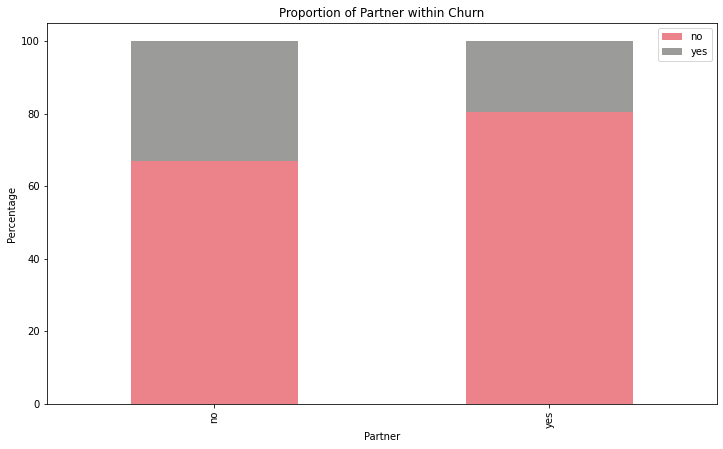

In [102]:
partner = df.groupby(['Partner','Churn']).size().unstack()

colors= ['#ec838a','#9b9c9a'] 
tab = (partner.T * 100/partner.T.sum())
ax = tab.T.plot(kind = 'bar', stacked = True, 
                figsize = (12,7), color = colors)

plt.title(f'Proportion of {test.columns.name} within Churn')
plt.ylabel('Percentage')
plt.legend(loc = 'upper right', fontsize = 'medium')


def stacked_bars(df, target): 
    """Pass a dataframe and plot all categorical dimension as a stacked bar chart"""
    for i in range(df.shape[1]):
        for col in df.columns: 
            if df[col].dtype == 'O' and col != 'customerID': 
                col_name = col
                dim = df.groupby([col,df[target]]).size().unstack()
        return dim

stacked_bars(df,'Churn')


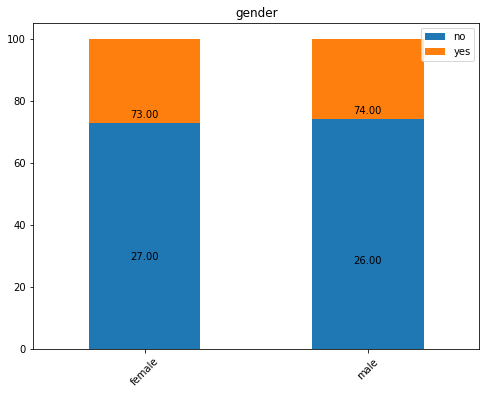

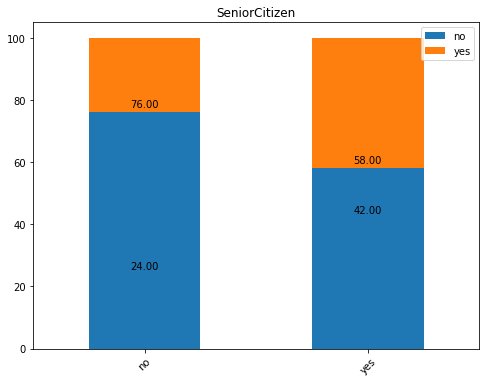

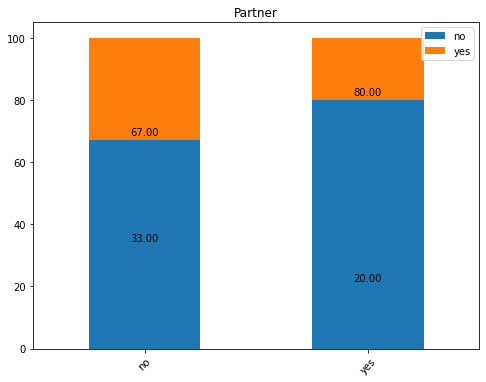

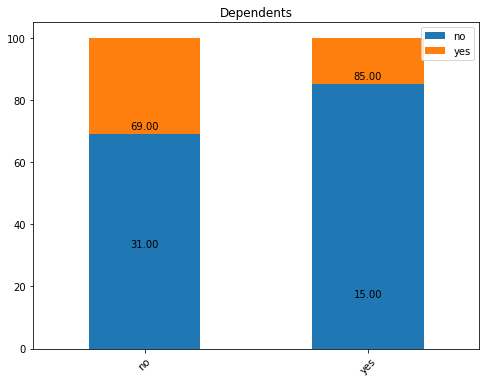

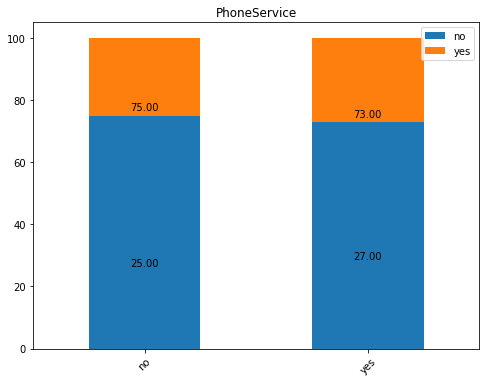

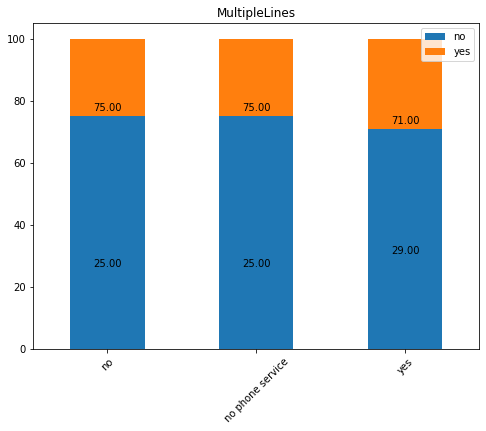

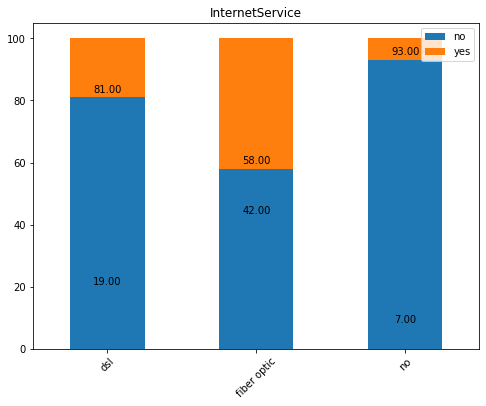

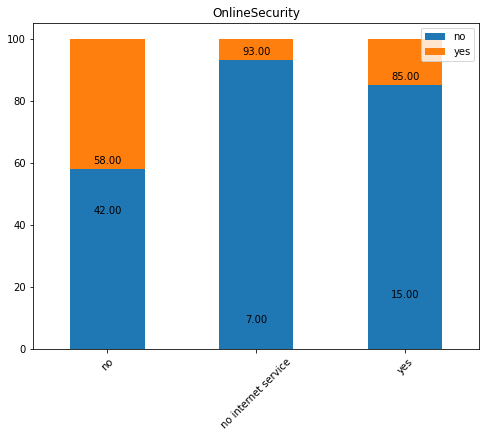

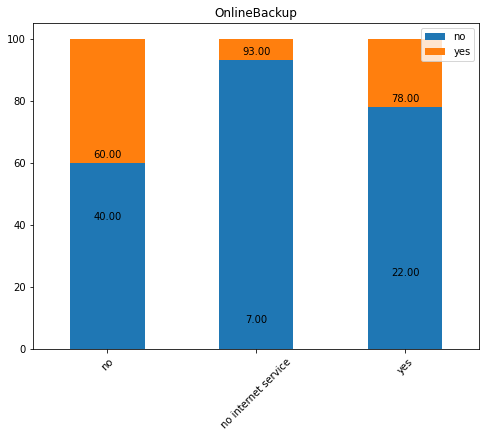

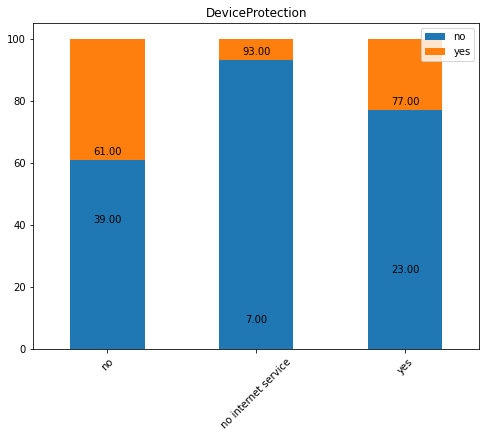

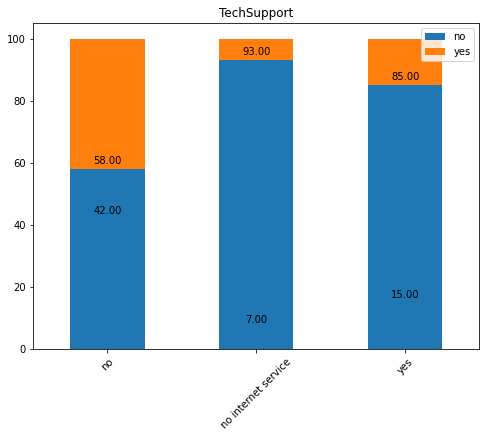

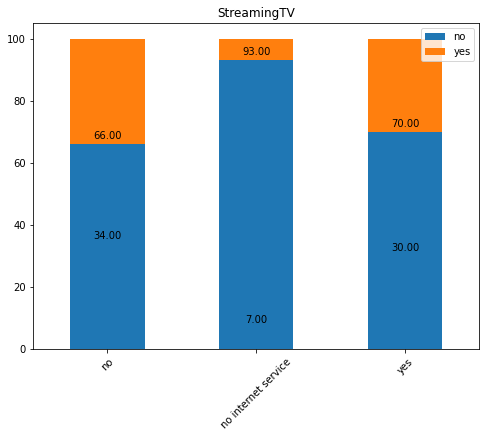

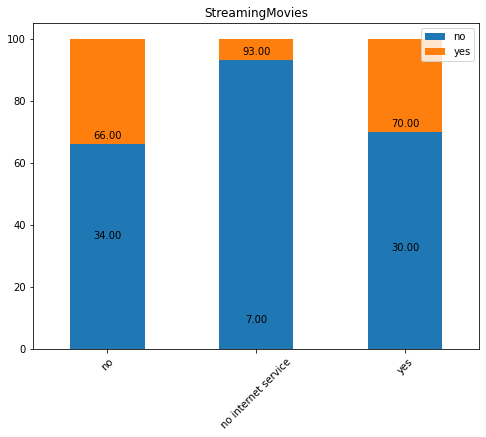

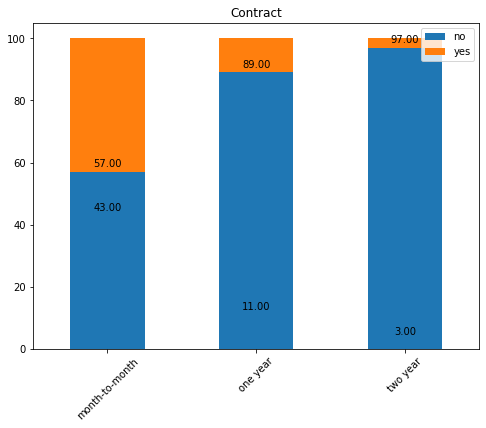

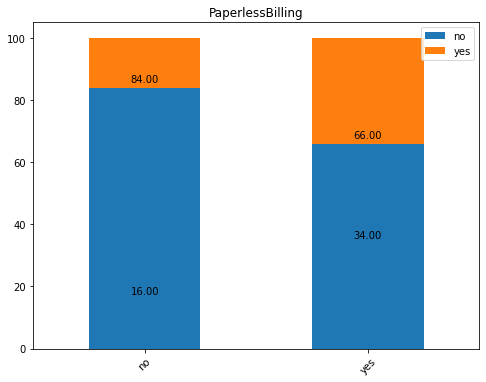

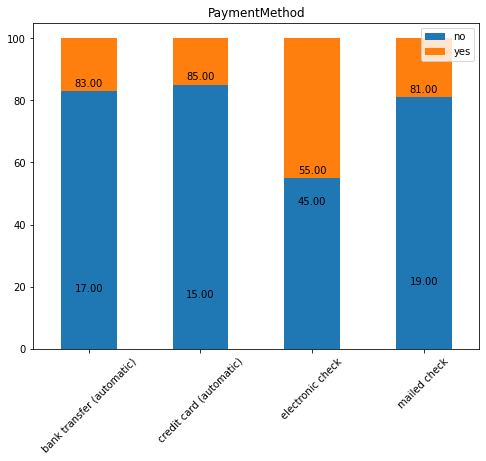

In [220]:
def stacked_bars(df,target):
    for c,n in enumerate(df.columns): 
        if df[n].dtype == 'O' and n != 'customerID' and n!='Churn':
            dim = df.groupby([n,'Churn']).size().unstack()
            ax = round((dim.T*100/dim.T.sum()).T,0)
            plots= ax.plot(kind='bar', stacked = True, rot = 45,figsize = (8,6))
            plt.title(n)
            plt.xlabel(None)
            plt.legend(loc = 'upper right')
            for bar in plots.patches: 
                plots.annotate(format(bar.get_height(), '.2f'),
                               (bar.get_x() + bar.get_width() / 2,
                                bar.get_height()), ha='center', va='center',
                               size=10, xytext=(0,8),
                               textcoords='offset points')
            
stacked_bars(df,'Churn')

## Session ends ##

In [ ]:
sns.kdeplot(data = df,x = 'MonthlyCharges',hue = 'Churn',cumulative = True, common_norm= False)

In [ ]:
# Share of Churns within Partner group
partner = pd.crosstab(df['Partner'], 
            df['Churn'], 
            normalize = 'columns',
            margins = True)
partner

In [ ]:
# Share of Churns within dependents group
dependents = pd.crosstab(df['Dependents'], 
            df['Churn'], 
            normalize = 'columns',
            margins = True)
dependents

In [ ]:
# Share of Churns within senior citizen group
senior_cit = pd.crosstab(df['SeniorCitizen'], 
            df['Churn'], 
            normalize ='columns',
            margins = True)
senior_cit

## Personas Findings ##

- *SeniorCitizen* is not specific enough to draw conclusions (yes = over 65 years old)
- *Dependents* and *Partner* are conceptually correlated (if you don't have a partner then you don't have dependents, exceptions occur of course)

Hence, we know about churners that: 
- 64% of them do not have a partner 
- 83% of them do not have dependents 

We might think these are young individuals but we can't prove the assumptio as we don't have data about the age. 

In [ ]:
# Share of internet service in relation to online security
pd.crosstab(df['InternetService'], 
            df['OnlineSecurity'],
            normalize = 'columns')

## Product Findings ## 

- Fiber optic is a main churning driver 
- Not owning addons such as tech support, streaming tv etc. leads to more churns. These addons might be related to customers owning fiber optic as a plan.


## Tenure Analysis ## 

# Analysing Numerical Data #

One of the first questions I'm asking myself is related to contract tenure: 

- After how long do customer tend to churn? 
- Can we observe different tenure lenghts between churners and non-churners?

In [ ]:
sns.boxplot(x = 'Churn', y ='tenure',data = df)
plt.title('Distribution of Tenures among Churn Type')

In [ ]:
fig, ax1 = plt.subplots(1,figsize = (10,10))
sns.kdeplot(data = df, x='tenure', hue= 'Churn', fill = True, ax = ax1)
ax1.set_title("Density distribution of Tenure by Churn")

In [ ]:
fig, ax1= plt.subplots(1,figsize = (10,8))
sns.kdeplot(data=df, x="tenure", hue="Churn", cumulative = True, common_norm = False, ax = ax1)
plt.title("ECDF of Tenure by Churn Type")

In [ ]:
fig, ax = plt.subplots(2,1,figsize = (10,10))
sns.histplot(data = df[df.Churn == 'yes'] , x = 'tenure', hue = 'Churn',ax = ax[0])
ax[0].set_title('Churners Tenure')
ax[0].set_xlabel('Tenure (Months)')
sns.histplot(data = df[df.Churn == 'no'] , x = 'tenure', hue = 'Churn',ax = ax[1])
ax[1].set_title('Non Churners Tenure')
ax[1].set_xlabel('Tenure (Months)')

There  is a clear pattern occurring in the first ~ 12 months contract. This is the critical part where customers tend to churn the most. Once the contrac approaches ~ 2 years the likelihood of churning decreases. 

**Almost 50% of the churners have a contract len to 10 months**. If we understand what happens in this range **we might reduce the churner by 50%**. 

- Why are contracts been cancelled within the first year? 
- Are they month-to-month contracts? If yes what is the monthly charge for them? What kind of product do they have? 


In [ ]:
# Tenure Distribution
fig, ax = plt.subplots(2,1, figsize =(10,10))
sns.kdeplot(data= df[df.Churn == 'yes'], x = 'tenure', hue = 'InternetService',fill = True,ax = ax[0])
ax[0].set_title('Tenure Distribution - CANCELLATIONS')
sns.kdeplot(data= df[df.Churn == 'no'], x = 'tenure', hue = 'InternetService',fill = True,ax = ax[1])
ax[1].set_title('Tenure Distribution - RETAINED')

In [ ]:
sns.boxplot(data = df, x = 'Churn', y = 'MonthlyCharges')

## Monthly Charges Distribution ##
- The distribution of monthly charges for churners is clearly skewed towards higher values. 
- This means that churners might have decided to leave due to costs. 

In [ ]:
# Expensive Products 
sns.boxplot(data = df, x = 'Contract', y = 'MonthlyCharges', hue = 'Churn')

## Whooops! ## 

Because fiber optic was one of the main churn driver and high montly charges are related to most of the churns, I though to see a pattern in the distribution of the 2 dimensions. But on the contrary, churners have lower monthly charges within each product. 

Why???

In [ ]:
def converter(df_col): 
    if df_col == 'yes': 
        return 1 
    else: 
        return 0

In [ ]:
bool_conv = ['Partner','Dependents']
for c in bool_conv: 
    df[c] = df[c].map(converter)

In [ ]:
df.corr()

In [ ]:
# Append features with more than 2 unique values into a list and pass it as argument into pd.get_dummies
features = ['InternetService','StreamingTV','Contract']

In [ ]:
sns.jointplot(data = df[df['Churn']=='yes'], x ='MonthlyCharges', y = 'tenure', kind = 'hex', color = '#b30000')
sns.jointplot(data = df[df['Churn']=='no'], x ='MonthlyCharges', y = 'tenure', kind = 'hex' , color ='#0a290a')

## .. To be continued ##

## Here starts the testing environment ##

In [ ]:
sns.displot(df, x='MonthlyCharges', hue= 'Churn', kind = 'kde', fill = True)
plt.title("Density distribution of Monthly Charges")

In [ ]:
sns.boxplot(df['InternetService'],df['MonthlyCharges'])
plt.title("Distribution of Monthly Charges within Internet Service Groups")

In [ ]:
sns.boxplot(df['Churn'], df['tenure'])

In [ ]:
df[['Churn', 'tenure']].groupby('Churn').agg(['mean', 'median'])

The average tenure length for churners is around 17 months with a median of 10. 

This means that the main problem to tackle is within the first year contract.

In [ ]:
one_y_tenure = df[df['tenure']<=10]

In [ ]:
for c, n in enumerate([c for c in one_y_tenure.columns if one_y_tenure[c].dtype == 'O']): 
    plt.figure(c)
    _ = sns.countplot(data = one_y_tenure, x = n, hue = 'Churn')
    plt.xticks(rotation =75)

In [ ]:
df.hist(figsize = (14,18), bins = 10)

In [ ]:
sns.pairplot(df[['Churn','tenure', 'MonthlyCharges','TotalCharges']], hue = 'Churn', size = 3.5)

I will define a converter function to change obj into boolean numerical. 

In [ ]:
to_convert = ['Churn']
for c in to_convert: 
    if c in df.columns: 
        df[c] = df[c].apply(converter)

In [ ]:
def converter(col): 
    if col == 'yes': 
        return 1 
    else: 
        return 0

In [ ]:
df = df.drop('customerID',axis = 1)

In [ ]:
def percentage_of_totals(col1,data = df,target = 'Churn'): 
    ct = pd.crosstab(data[target], 
                     data[col1], 
                     normalize = 'index')
    sns.heatmap(ct, annot = True)
    plt.show()

In [ ]:
sns.countplot(data = df , x = 'InternetService' , hue = 'OnlineSecurity')

In [ ]:
percentage_of_totals('OnlineSecurity')

In [ ]:
df_dummies

In [ ]:
df_corr = df_dummies.corr()


In [ ]:
sns.displot(df['tenure'])


In [ ]:

plt.hist(df['tenure'])